#EXPLORATORY DATA ANALYSIS

Memasukkan Data

In [1]:
import pandas as pd

In [ ]:
data2018=pd.read_csv('Crime2018.csv', sep=',')

In [ ]:
data2019=pd.read_csv('Crime2019.csv', sep=',')

In [ ]:
data2020=pd.read_csv('Crime2020.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data2018.shape

(98888, 17)

In [ ]:
data2019.shape

(19782, 17)

In [ ]:
data2020.shape

(70894, 17)

Menggabungkan data

In [ ]:
datacrime=[data2018,data2019,data2020]

In [ ]:
datacrimegab=pd.concat(datacrime)

In [ ]:
datacrimegab.to_csv('datacrimegab.csv')

In [ ]:
datacrimegab.shape

(189564, 17)

Melihat tipe variabel

In [ ]:
datacrimegab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189564 entries, 0 to 70893
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      189564 non-null  object 
 1   OFFENSE_CODE         189564 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null   object 
 3   OFFENSE_DESCRIPTION  189564 non-null  object 
 4   DISTRICT             188527 non-null  object 
 5   REPORTING_AREA       189564 non-null  object 
 6   SHOOTING             91078 non-null   object 
 7   OCCURRED_ON_DATE     189564 non-null  object 
 8   YEAR                 189564 non-null  int64  
 9   MONTH                189564 non-null  int64  
 10  DAY_OF_WEEK          189564 non-null  object 
 11  HOUR                 189564 non-null  int64  
 12  UCR_PART             98868 non-null   object 
 13  STREET               187948 non-null  object 
 14  Lat                  183135 non-null  float64
 15  Long              

Missing Value

In [ ]:
#jumlah missing
datacrimegab.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     90676
OFFENSE_DESCRIPTION        0
DISTRICT                1037
REPORTING_AREA             0
SHOOTING               98486
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               90696
STREET                  1616
Lat                     6429
Long                    6429
Location                   0
dtype: int64

In [ ]:
#persentase jumlah missing
datacrimegab.isnull().sum()/len(datacrimegab)

INCIDENT_NUMBER        0.000000
OFFENSE_CODE           0.000000
OFFENSE_CODE_GROUP     0.478340
OFFENSE_DESCRIPTION    0.000000
DISTRICT               0.005470
REPORTING_AREA         0.000000
SHOOTING               0.519540
OCCURRED_ON_DATE       0.000000
YEAR                   0.000000
MONTH                  0.000000
DAY_OF_WEEK            0.000000
HOUR                   0.000000
UCR_PART               0.478445
STREET                 0.008525
Lat                    0.033915
Long                   0.033915
Location               0.000000
dtype: float64

Duplikasi Data

In [ ]:
datacrimegab[datacrimegab.duplicated()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1843,I182104066,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,434,Y,2018-12-27 00:34:00,2018,12,Thursday,0,Part One,DYER ST,42.283369,-71.080380,"(42.28336878, -71.08038038)"
1844,I182104066,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,434,Y,2018-12-27 00:34:00,2018,12,Thursday,0,Part One,DYER ST,42.283369,-71.080380,"(42.28336878, -71.08038038)"
1921,I182103979,3502,Missing Person Located,MISSING PERSON - LOCATED,B2,319,NaN,2018-12-23 18:00:00,2018,12,Sunday,18,Part Three,CHENEY ST,42.309700,-71.085824,"(42.30970016, -71.08582414)"
3033,I182102694,3201,Property Lost,PROPERTY - LOST,B3,469,NaN,2018-12-21 06:00:00,2018,12,Friday,6,Part Three,BLUE HILL AVE,42.275679,-71.093640,"(42.27567917, -71.09363988)"
3195,I182102518,3001,Medical Assistance,DEATH INVESTIGATION,E13,637,NaN,2018-12-20 12:49:00,2018,12,Thursday,12,Part Three,BOYLSTON ST,42.318581,-71.109899,"(42.31858074, -71.10989890)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98880,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,NaN,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
98881,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,NaN,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
98883,I070720870-00,802,Simple Assault,ASSAULT & BATTERY,B2,318,NaN,2018-12-13 00:00:00,2018,12,Thursday,0,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
98884,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,NaN,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"


In [ ]:
datacrimegab.duplicated().sum()

161

Outlier

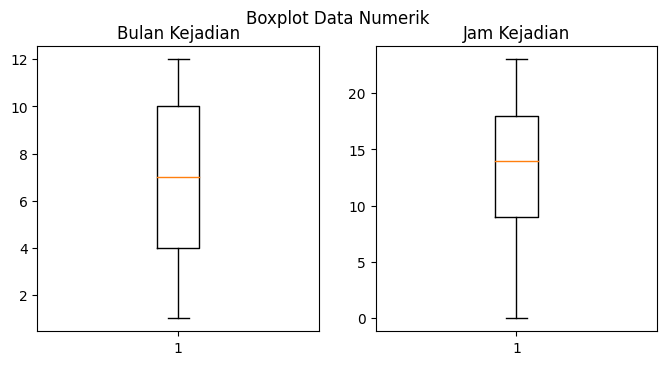

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("default")
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,3.7))

ax1.boxplot(datacrimegab["MONTH"])
ax1.set_title('Bulan Kejadian')
ax2.boxplot(datacrimegab['HOUR'])
ax2.set_title('Jam Kejadian')
fig.suptitle("Boxplot Data Numerik")
plt.show()

Sebaran Data Object

In [ ]:
datacrimegab['OFFENSE_CODE'].value_counts()

3115     11807
3006     10072
3831      9827
1402      8238
3114      7894
         ...  
1500         1
99999        1
2605         1
600          1
2600         1
Name: OFFENSE_CODE, Length: 205, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


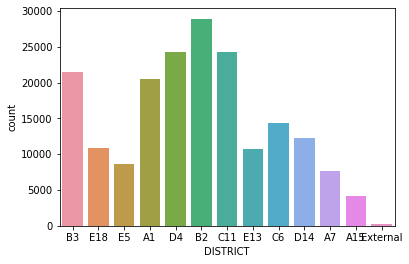

In [ ]:
import seaborn as sns
sns.countplot('DISTRICT', data = datacrimegab)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


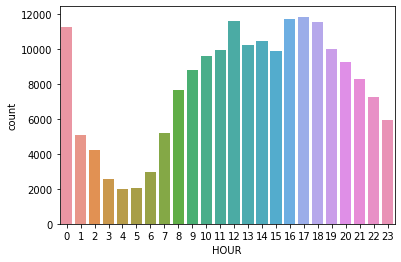

In [ ]:
sns.countplot('HOUR', data=datacrimegab)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


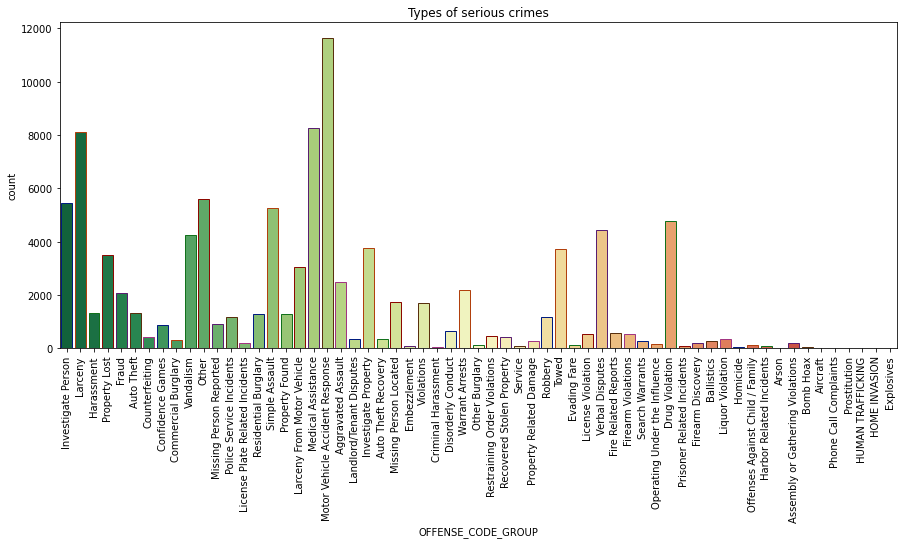

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('OFFENSE_CODE_GROUP',data=datacrimegab,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Types of serious crimes')
plt.show()

Text(0.5, 1.0, 'Pie Plot SHOOTING')

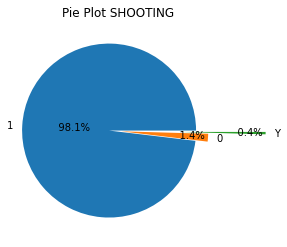

In [ ]:
labels=['1', '0', 'Y']
explode = (0.1, 0.04, 0.7)

sizes = datacrimegab['SHOOTING'].value_counts() 

plt.pie(sizes, explode=explode, labels=labels,autopct='%15.01f%%',data=datacrimegab)
plt.title('Pie Plot SHOOTING')

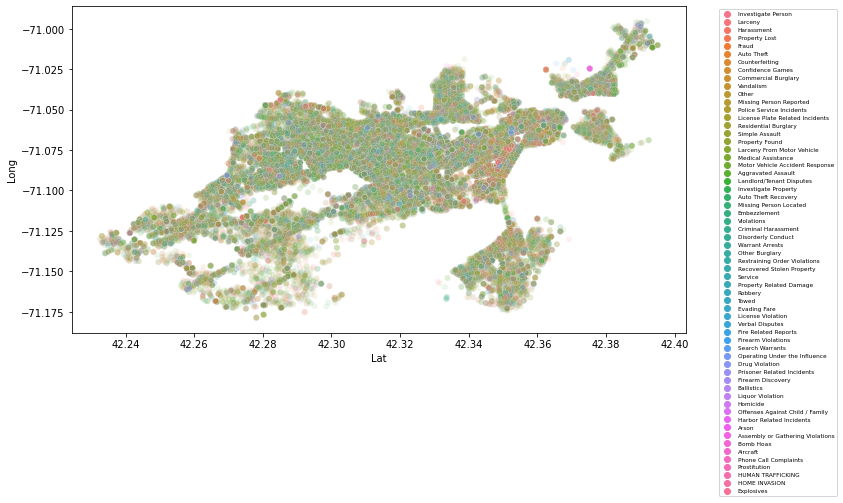

In [ ]:
from pylab import rcParams
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')

data2018.Lat.replace(-1, None, inplace=True)
data2018.Long.replace(-1, None, inplace=True)

rcParams["figure.figsize"] = 21,11

plt.subplots(figsize=(11,6))
sns.scatterplot(x='Lat',
                y='Long',
                hue='OFFENSE_CODE_GROUP',
                alpha=0.1,
                data=data2018)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop=fontP)

In [ ]:
datacrimegab['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response    11647
Medical Assistance                  8257
Larceny                             8116
Other                               5600
Investigate Person                  5467
                                   ...  
HOME INVASION                         19
Aircraft                              18
Arson                                 18
Explosives                             7
HUMAN TRAFFICKING                      1
Name: OFFENSE_CODE_GROUP, Length: 61, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


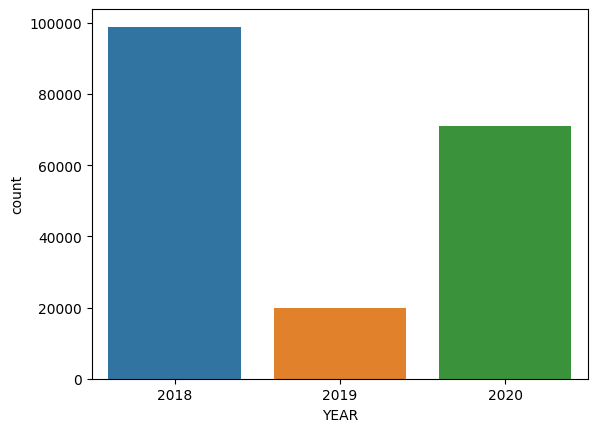

In [ ]:
sns.countplot(datacrimegab['YEAR'])

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

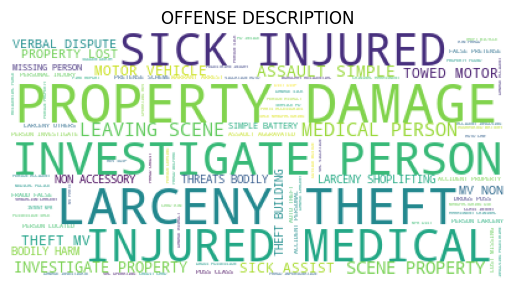

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stop = set(stopwords.words('english'))
def cloud(text):
    wordcloud = WordCloud(background_color="white",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("OFFENSE DESCRIPTION")

cloud(datacrimegab['OFFENSE_DESCRIPTION'])

In [ ]:
datacrimegab['OFFENSE_DESCRIPTION'].value_counts()

INVESTIGATE PERSON                         11807
SICK/INJURED/MEDICAL - PERSON              10072
M/V - LEAVING SCENE - PROPERTY DAMAGE       9827
VANDALISM                                   8238
INVESTIGATE PROPERTY                        7894
                                           ...  
Migrated Report - Other Part II                1
Migrated Report - Weapons Violation            1
Evidence Tracker Incidents                     1
HUMAN TRAFFICKING - COMMERCIAL SEX ACTS        1
Migrated Report - Auto Law Violation           1
Name: OFFENSE_DESCRIPTION, Length: 231, dtype: int64

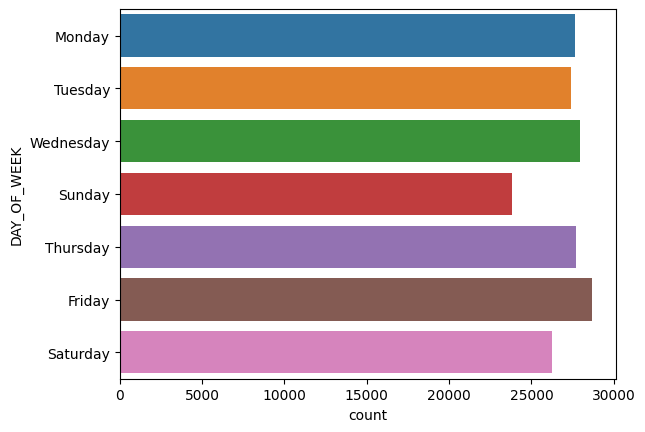

In [ ]:
sns.countplot(y=datacrimegab['DAY_OF_WEEK'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


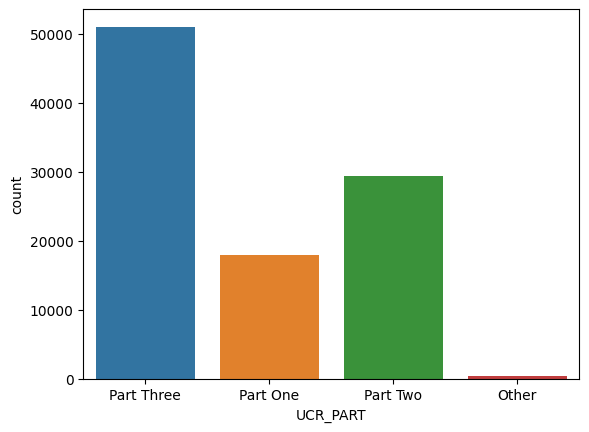

In [ ]:
sns.countplot(datacrimegab['UCR_PART'])

Korelasi tiap variabel

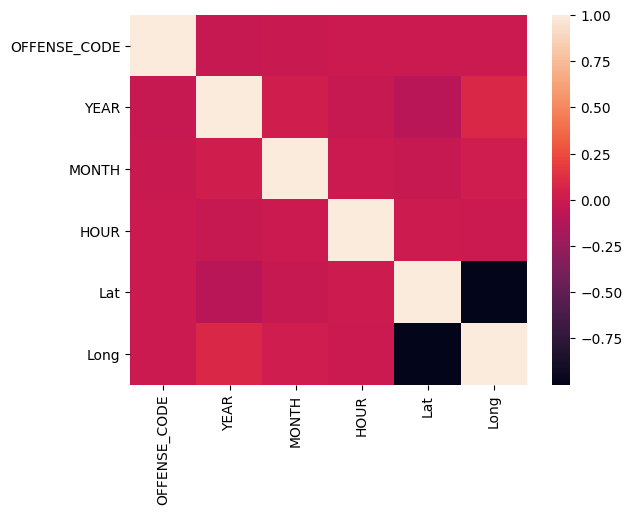

In [ ]:
corr=datacrimegab.corr()
sns.heatmap(corr)

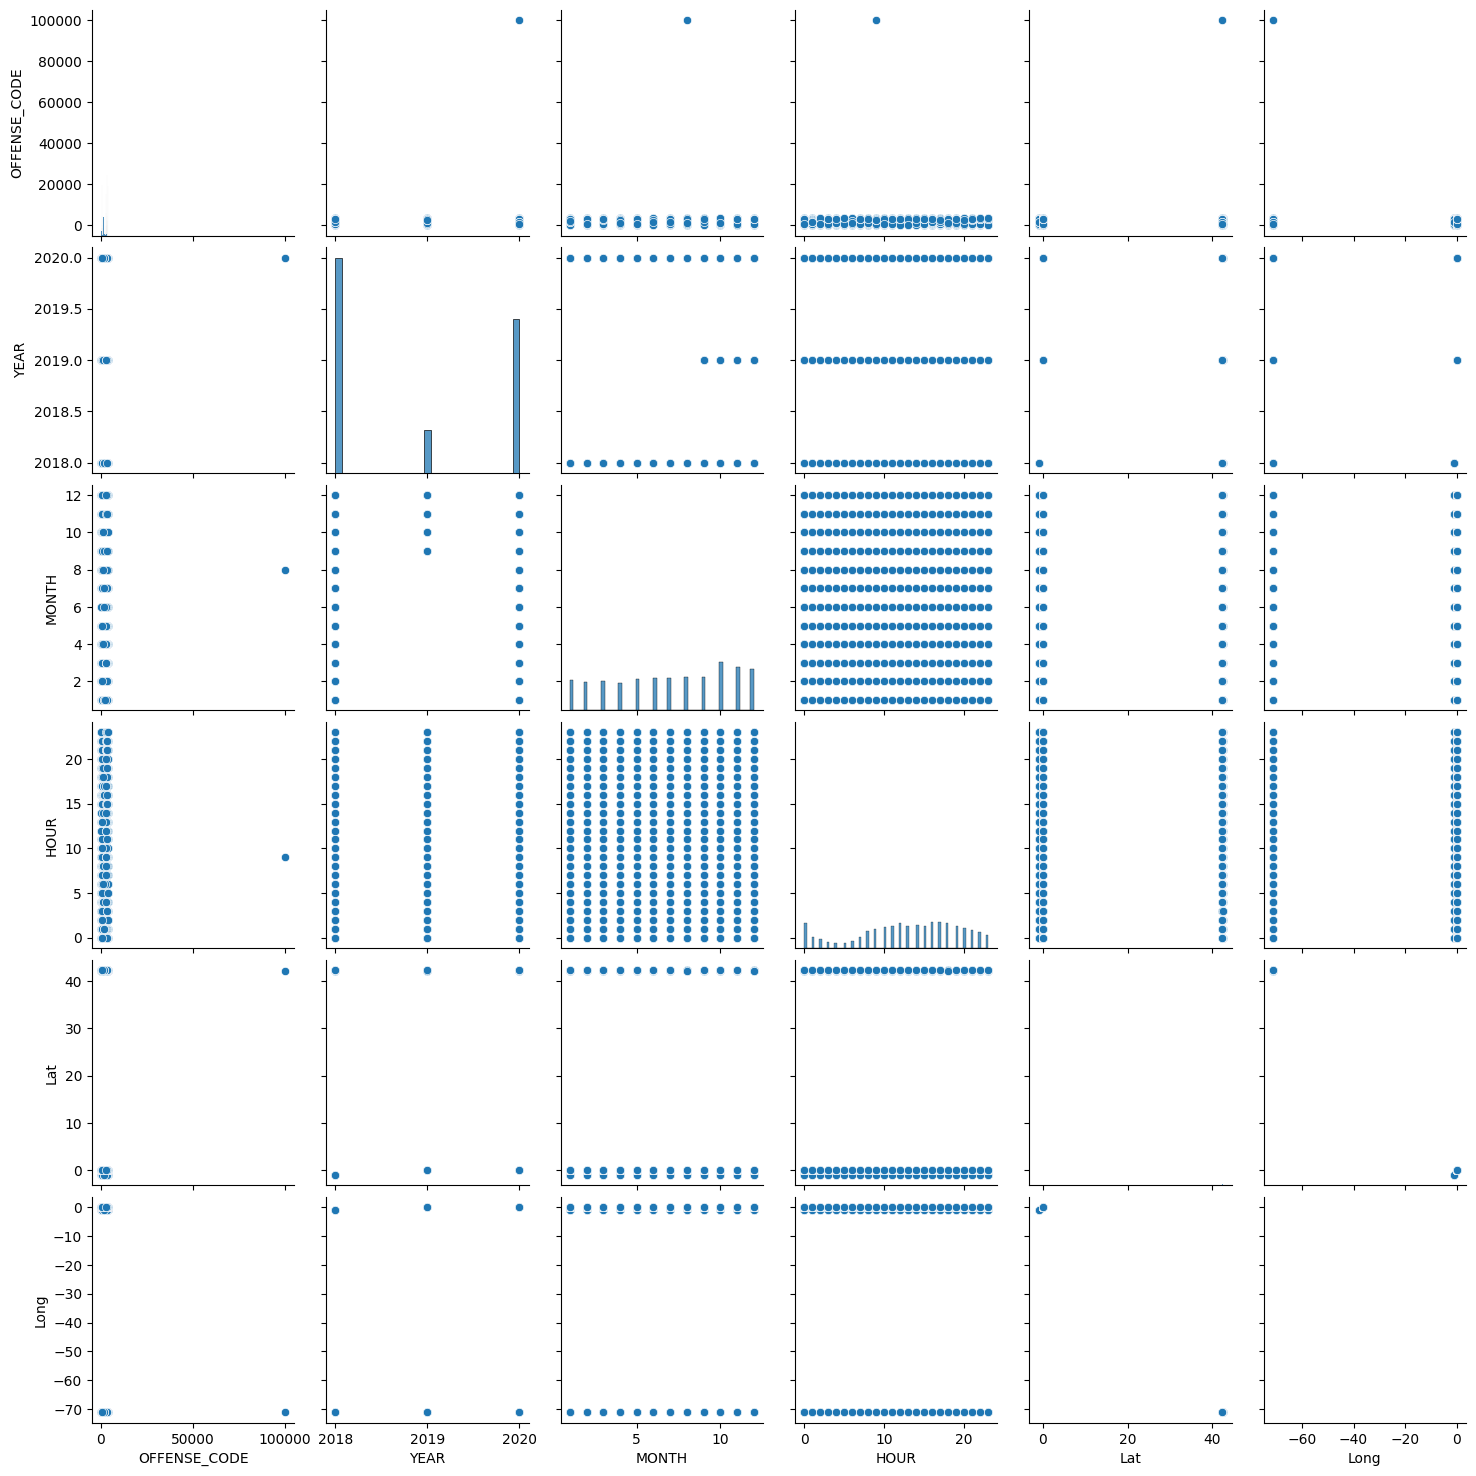

In [ ]:
sns.pairplot(datacrimegab)

#PYTHON dari query SQL

In [ ]:
#1
datacrimegab['DISTRICTnonNum']=datacrimegab.DISTRICT.str.replace('[^a-zA-Z]', '')
datacrimegab['DISTRICTnonNum'].value_counts()

B           50411
C           38736
D           36551
A           32281
E           30228
External      320
Name: DISTRICTnonNum, dtype: int64

In [ ]:
#2
datacrimegab['OFFENSE_DESCRIPTION'][(datacrimegab['YEAR'] ==2020) & (datacrimegab['YEAR'] != 2019) ]

0                                       INVESTIGATE PERSON
1                                       INVESTIGATE PERSON
2                          FRAUD - CREDIT CARD / ATM FRAUD
3                                          FRAUD - WELFARE
4                          HARASSMENT/ CRIMINAL HARASSMENT
                               ...                        
70889                                 INVESTIGATE PROPERTY
70890                                FRAUD - IMPERSONATION
70891    WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...
70892    WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...
70893                                BURGLARY - COMMERICAL
Name: OFFENSE_DESCRIPTION, Length: 70894, dtype: object

In [3]:
#3
datacrimegab['OFFENSE_DESCRIPTION'].loc[datacrimegab['MONTH']==10].value_counts()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,3,7,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


INVESTIGATE PERSON                       1336
M/V - LEAVING SCENE - PROPERTY DAMAGE    1170
SICK/INJURED/MEDICAL - PERSON            1022
VANDALISM                                 917
INVESTIGATE PROPERTY                      881
                                         ... 
CHILD ABANDONMENT (NO ASSAULT)              1
BURGLARY - COMMERICAL - NO FORCE            1
ROBBERY - HOME INVASION                     1
ANNOYING AND ACCOSTING                      1
FIREARM/WEAPON - LOST                       1
Name: OFFENSE_DESCRIPTION, Length: 189, dtype: int64

In [ ]:
#4
datacrimegab.groupby('DISTRICTnonNum')['DAY_OF_WEEK'].apply(lambda x: (x=='Sunday').sum())+datacrimegab.groupby('DISTRICTnonNum')['DAY_OF_WEEK'].apply(lambda x: (x=='Saturday').sum())

DISTRICTnonNum
A            8819
B           13235
C           10285
D            9827
E            7579
External       69
Name: DAY_OF_WEEK, dtype: int64

In [ ]:
#5
datacrimegab.groupby('DISTRICTnonNum')['INCIDENT_NUMBER'].count()-(datacrimegab.groupby('DISTRICTnonNum')['DAY_OF_WEEK'].apply(lambda x: (x=='Sunday').sum())+datacrimegab.groupby('DISTRICTnonNum')['DAY_OF_WEEK'].apply(lambda x: (x=='Saturday').sum()))

DISTRICTnonNum
A           23462
B           37176
C           28451
D           26724
E           22649
External      251
dtype: int64

#Machine Learning

Memilih variabel yang digunakan pemodelan

In [ ]:
#Menghapus kolom identitas
datacrimegab=datacrimegab.drop(['INCIDENT_NUMBER','Long','Lat','Location'],axis=1)

Mengatasi tipe data

In [ ]:
import datetime
datacrimegab['OCCURRED_ON_DATE'] = pd.to_datetime(datacrimegab['OCCURRED_ON_DATE'])

Mengatasi missing value

In [ ]:
# 1. Menghapus kolom yang memiliki missing 50%
datacrimegab=datacrimegab.drop(['OFFENSE_CODE_GROUP','SHOOTING','UCR_PART'], axis=1)

In [ ]:
# 2. Menghapus baris missing karena data wilayah dan jalan tidak cocok di imputasi
datacrimegab=datacrimegab.dropna()

Mengatasi duplikasi data 

In [ ]:
# Menghapus data yang terdapat duplikasi
datacrimegab=datacrimegab.drop_duplicates()

Feature Engineering

In [ ]:
datacrimegab.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
0,3115,INVESTIGATE PERSON,B3,468,2018-04-30 09:00:00,2018,4,Monday,9,HAZLETON ST
1,619,LARCENY ALL OTHERS,E18,496,2018-03-06 08:00:00,2018,3,Tuesday,8,HYDE PARK AVE
2,2629,HARASSMENT,E5,662,2018-10-31 12:00:00,2018,10,Wednesday,12,PRIMROSE ST
3,2629,HARASSMENT,A1,96,2018-04-09 08:43:00,2018,4,Monday,8,ATLANTIC AVE
4,3208,PROPERTY - MISSING,D4,132,2018-01-01 00:00:00,2018,1,Monday,0,COMMONWEALTH AVE


In [ ]:
#One-Hot-Encode dengan variabel dummy
datacrimegab= pd.get_dummies(datacrimegab, columns=["DISTRICT"] )

In [ ]:
#Label Encoder
datacrimegab['DAY_OF_WEEK']=datacrimegab['DAY_OF_WEEK'].replace({'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})

In [ ]:
# feature baru
def create_features(datacrimegab):
    datacrimegab['weekofyear'] = datacrimegab['OCCURRED_ON_DATE'].dt.weekofyear
    X = datacrimegab['weekofyear']
    return X

In [ ]:
datacrimegab=datacrimegab.drop(['REPORTING_AREA'], axis=1)

Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
x_data = datacrimegab.drop(['HOUR'],axis=1)
y_data = datacrimegab['HOUR']

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 1)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [1,6,12],
           "min_samples_leaf":[1,5,10],
           "min_weight_fraction_leaf":[0.1,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,50,90] }
           

In [ ]:
reg_decision_model=DecisionTreeRegressor()

In [ ]:
modelDTR=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)

In [ ]:
modelDTR.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.390, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.541, total=   0.1s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-40.108, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-40.395, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=-40.216, total=   0.0s
[CV] ma

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_f

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.1s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.390, total=   0.1s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.555, total=   0.0s
[CV] max_dep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.1s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.390, total=   0.1s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.555, total=   0.0s
[CV] max_depth=1, max_feat

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.1s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.390, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.555, total=   0.1s
[CV] max_depth=1, max_features=au

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.1s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.390, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.555, total=   0.0s
[CV] max_depth=1, max_features=au

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.129, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.418, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.555, total=   0.0s
[CV] max_depth=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.131, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.398, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.230, total=   0.0s
[CV] max_depth=1, max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.129, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.418, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.398, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=1, max_features=l

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.398, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.230, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.563, total=   0.0s
[CV] max_depth=1, max_features=lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.126, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.390, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.230, total=   0.0s
[CV] max_depth=1, max_features=log2

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.126, total=   0.0s
[CV] max_depth=1, max_features=lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.395, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.241, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.592, total=   0.0s
[CV] max_depth=1, max_features=sq

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.127, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.395, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.234, total=   0.0s
[CV] max_depth=1, max_features=sqrt

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.126, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.412, total=   0.0s
[CV] max_depth=1, max_features=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_l

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.398, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.592, total=   0.0s
[CV] max_depth=1, max_features=sq

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.395, total=   0.0s
[CV] max_depth=1, max_features=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.390, total=   0.1s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.555, total=   0.0s
[CV] max_depth=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.1s
[CV] max_depth=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_fe

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.1s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.390, total=   0.1s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.1s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.555, total=   0.0s
[CV] max_depth=1, max_features=No

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 


[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.390, total=   0.1s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.555, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.116, total=   0.1s
[CV] max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.390, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.555, total=   0.0s
[CV] max_depth=1, max_features=No

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.085, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.470, total=   0.1s
[CV] max_depth=6, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=6, ma

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.085, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.470, total=   0.1s
[CV] max_depth=6, max_features=au

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.085, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.470, total=   0.1s
[CV] max_depth=6, max_features=au

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=6, max_features=auto

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.085, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.470, total=   0.1s
[CV] max_depth=6, max_feat

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=6, max_features

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=auto, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.110, total=   0.1s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.376, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.230, total=   0.0s
[CV] max_depth=6, max_features=log2

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.081, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.388, total=   0.1s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.200, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.548, total=   0.1s
[CV] max_depth=6, max_feat

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.097, total=   0.1s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.334, total=   0.1s
[CV] max_depth=6, max_features=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.108, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.377, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.235, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.516, total=   0.0s
[CV] max_depth=6, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.117, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.386, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.210, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.465, total=   0.1s
[CV] max_depth=6, max_features=sq

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.103, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.381, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.203, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.548, total=   0.1s
[CV] max_depth=6, max_features=sq

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.104, total=   0.0s
[CV] max_depth=6, max_features

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.112, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.416, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.207, total=   0.0s
[CV] max_depth=6, max_features=sqrt

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.369, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.230, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.546, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.562, total=   0.0s
[CV] max_depth=6, max_feat

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.2s
[CV] max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.085, total=   0.1s
[CV] max_depth=6, max_features=N

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=6, max_features=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.2s
[CV] max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.085, total=   0.1s
[CV] max_depth=6, max_features=Non

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=6, max_features=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.085, total=   0.1s
[CV] max_depth=6, max_features=Non

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=6, max_features

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_f

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=12, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.085, total=   0.1s
[CV] max_depth=12, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=12, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=au

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=12, max_fea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=12, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 


[CV]  max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.085, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.470, total=   0.1s
[CV] max_depth=12,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.058, total=   0.1s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.367, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.211, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.544, total=   0.0s
[CV] max_dep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_f

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.082, total=   0.0s
[CV] max_dep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.092, total=   0.1s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.378, total=   0.1s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.244, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.552, total=   0.0s
[CV] max_depth=12, max_fea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.068, total=   0.1s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.334, total=   0.1s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.201, total=   0.1s
[CV] max_depth=12, max_feat

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.115, total=   0.1s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.356, total=   0.1s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.206, total=   0.0s
[CV] max_depth=12, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.092, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.362, total=   0.1s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.210, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.580, total=   0.0s
[CV] max_depth=12, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.075, total=   0.1s
[CV] max_depth=12, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.121, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.377, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.159, total=   0.1s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.539, total=   0.0s
[CV] max_depth=12, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_feat

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.051, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.357, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.205, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.514, total=   0.0s
[CV] max_dep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_f

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_dept

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_feature

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.092, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.389, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.235, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.541, total=   0.0s
[CV] max_depth=12, max_fea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.125, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.369, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.214, total=   0.0s
[CV] max_depth=12, max_feat

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=-40.082, total=   0.0s
[CV] max_depth=12, max_fea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.085, total=   0.1s
[CV] max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.470, total=   0.1s
[CV] max_dep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] ma

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.2s
[CV] max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.085, total=   0.1s
[CV] max_depth=12, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=-40.303, total=   0.1s
[CV] max_depth=12, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-40.034, total=   0.1s
[CV] max_depth=12, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=12, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV]  max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 6, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_le

In [ ]:
# summarize results
print("Best: %f using %s" % (modelDTR.best_score_, modelDTR.best_params_))
means = modelDTR.cv_results_['mean_test_score']
stds = modelDTR.cv_results_['std_test_score']
params = modelDTR.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -40.268853 using {'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
-40.361296 (0.176323) with: {'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
-40.370093 (0.184523) with: {'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'random'}
-40.390730 (0.181620) with: {'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.5, 'splitter': 'best'}
-40.390730 (0.181620) with: {'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.5, 'splitter': 'random'}
nan (nan) with: {'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.9, 'splitter': 'best'}

In [ ]:
hasil_gridsearch=pd.concat([pd.DataFrame(modelDTR.cv_results_["params"]),pd.DataFrame(modelDTR.cv_results_["mean_test_score"], columns=["MSE"])],axis=1)
hasil_gridsearch.to_excel('tuningparam2.xlsx')

Prediksi Data

In [ ]:
datapred=pd.read_csv('dataprediksi.csv', sep=';')

In [ ]:
ypredik=modelDTR.predict(datapred)

In [ ]:
ypredik

array([12.51053864])